This time series analysis hopes to find a coorelation between accident location, type of issue, time taken to resolve issue, time of day, day of week, and month of year. This will help predict when and where an accident is likely to happen.

# Import necessary libraries

In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
import os
#from library.sb_utils import save_file

# Data Collection/Organization

In [154]:
file = 'Real-Time_Traffic_Incident_Reports.csv'

In [155]:

df = pd.read_csv(file, parse_dates=['Published Date', 'Status Date'])

df.head()
#I wanted to see what the data looked like in pandas. 
#I also changed published/status date to datetime objects from string

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00


# Data Wrangling

The column names have spaces in them. This will prove to be a problem with creating visualizations later so I'm going to change the variable names for the applicable columns.

In [156]:
df=df.rename(columns = {'Published Date':'published_date'})
df=df.rename(columns = {'Status Date':'status_date'})
df=df.rename(columns = {'Issue Reported':'issue_reported'})
df=df.rename(columns = {'Traffic Report ID':'tr_ID'})
df.head()

,tr_ID,published_date,issue_reported,Location,Latitude,Longitude,Address,Status,status_date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,2018-06-13 09:00:03+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,2018-06-13 11:20:03+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,2020-04-17 21:55:03+00:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,2020-04-17 21:55:03+00:00
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,2020-04-17 23:30:04+00:00


Exploring the Data and Converting Datatypes

In [157]:
df.shape
#big enough

(249650, 9)

There are 249,650 rows and 9 columns

In [158]:
df.describe()
#I assume I only get one column because it's the only numerical data type(float)

,Longitude
count,249571.000000
mean,-97.551690
std,4.211096
min,-98.816154
25%,-97.776950
50%,-97.734295
75%,-97.687038
max,0.000000


In [159]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors = 'coerce') #Converting Latitude to numeric(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249650 entries, 0 to 249649
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   tr_ID           249650 non-null  object             
 1   published_date  249650 non-null  datetime64[ns, UTC]
 2   issue_reported  249650 non-null  object             
 3   Location        249107 non-null  object             
 4   Latitude        249525 non-null  float64            
 5   Longitude       249571 non-null  float64            
 6   Address         249650 non-null  object             
 7   Status          247957 non-null  object             
 8   status_date     249650 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 17.1+ MB


In [160]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
tr_ID,0,0.000000
published_date,0,0.000000
issue_reported,0,0.000000
Address,0,0.000000
status_date,0,0.000000
Longitude,79,0.031644
Latitude,125,0.050070
Location,543,0.217505
Status,1693,0.678149


In [161]:
#The columns are missing some values are:
#Longitude - 3%
#Latitude - 5%
#Location - 21%, This will be dropped later as it is redundant and has more null values
#Status - 67%, This column will not be used for this analysis, it only inidicates whether a incident is archived or 
#not. Everything in this dataset is archived.

In [162]:
df.dropna(subset=['Latitude'],inplace=True)
df.dropna(subset=['Longitude'],inplace=True)
#Dropping null values in the above columns

In [163]:
df.describe()

,Latitude,Longitude
count,249525.000000,249525.000000
mean,30.245476,-97.551618
std,1.308834,4.211477
min,0.000000,-98.816154
25%,30.231876,-97.776912
50%,30.294128,-97.734295
75%,30.373668,-97.687038
max,31.077333,0.000000


In [164]:
print(df.Latitude.min())
print(df.Longitude.max())

0.0
0.0


Clearly we have more than NaN values to worry about. 0's don't help anything.

In [165]:
df = df[df.Latitude != 0]
df = df[df.Longitude != 0]

In [166]:
print(df.Latitude.min())
print(df.Longitude.max())

30.003883
-97.108986


We have now removed all NaN and 0 values from the Latitude and Longitude columns.

In [167]:
df.shape

(249061, 9)

### Recheck the null values

In [168]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
tr_ID,0,0.000000
published_date,0,0.000000
issue_reported,0,0.000000
Location,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Address,0,0.000000
status_date,0,0.000000
Status,1687,0.677344


So I thought it may be better to create a new location variable as a float but there were far too many null values for the new split 'Location" data. Instances of null in Latitude increased by 46. I place inplace+True to solve.

Status can likely be removed entirely as it does not really serve a purpose.

I'm dropping location becasue attempts to split and convert into float datatype created too many null values to be useful. Also, I already have Lat/Lon data to use.

In [169]:
df.drop(['Location'], axis=1, inplace=True) #(use this is Location show back up)
df.drop(['Status'], axis=1, inplace=True)
df.head(3)

,tr_ID,published_date,issue_reported,Latitude,Longitude,Address,status_date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00


Subtracting the published date from the status date will help find out how long these issues take to resolve which will be useful in helping avoid parts of town. The date and time are listed together, which may come in handy when classifying the severity of issues, but the date and time values will have to be seperated when we try to decipher seasonal and time of day data.

Changing the date columns from strings to date objects and creating a new column called issue timespan by subtracting published date from status date. There is a breakdown of different time measures for this columns in different columns.

In [170]:
issue_time = df['status_date'] - df['published_date']
issue_time.abs()
df['issue_timespan'] = issue_time
df.head()

,tr_ID,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09


I wanted to know what day of the week certain issues happened along with the volume of issue per day.¶

Hense, these datetime objects are converted into the days of the week

0 = Monday, 6 = Sunday and can be found on the published_day/status_day columns

In [171]:
pub_day = df['published_date'].dt.dayofweek
df['published_day'] = pub_day

df.head()

,tr_ID,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4


Converting issue_timespan column into seconds

I will also convert the timespan from seconds to minutes.

In [172]:
df['timespan_sec'] = df.issue_timespan.apply(lambda x: x.total_seconds())
df['timespan_min'] = df['timespan_sec']/60
df.head()

,tr_ID,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day,timespan_sec,timespan_min
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2,8644.0,144.066667
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2,3867.0,64.450000
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4,1800.0,30.000000
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4,851.0,14.183333
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4,8949.0,149.150000


#### THe tr_id is too long and make the head hard to read. I decided to shorten it as well as making it the new index.

In [173]:
df['short_ID'] = df['tr_ID'].str.slice(0,3)
df = df.drop('tr_ID', 1)
df.head()

/var/folders/d2/b8_107b155z0478lwpx5ssrr0000gp/T/ipykernel_20819/3810097633.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tr_ID', 1)


,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day,timespan_sec,timespan_min,short_ID
0,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2,8644.0,144.066667,C16
1,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2,3867.0,64.450000,6B2
2,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4,1800.0,30.000000,2A7
3,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4,851.0,14.183333,89D
4,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4,8949.0,149.150000,E7F


In [174]:
df.set_index('short_ID', inplace = True)
df.head()

,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day,timespan_sec,timespan_min
short_ID,,,,,,,,,,
C16,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2,8644.0,144.066667
6B2,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2,3867.0,64.450000
2A7,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4,1800.0,30.000000
89D,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4,851.0,14.183333
E7F,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4,8949.0,149.150000


In [175]:
#Recheck summary statistics
df.describe()

,Latitude,Longitude,issue_timespan,published_day,timespan_sec,timespan_min
count,249061.000000,249061.000000,249061,249061.000000,2.490610e+05,2.490610e+05
mean,30.301823,-97.733356,3 days 04:55:49.009290896,2.903461,2.769490e+05,4.615817e+03
std,0.093838,0.087198,44 days 19:14:50.566468034,1.935689,3.870891e+06,6.451484e+04
min,30.003883,-98.816154,-17577 days +05:40:00,0.000000,-1.518632e+09,-2.531054e+07
25%,30.232048,-97.777123,0 days 00:21:00,1.000000,1.260000e+03,2.100000e+01
50%,30.294401,-97.734380,0 days 00:42:23,3.000000,2.543000e+03,4.238333e+01
75%,30.373815,-97.687431,0 days 01:25:01,5.000000,5.101000e+03,8.501667e+01
max,31.077333,-97.108986,233 days 08:49:00,6.000000,2.016294e+07,3.360490e+05


As opposed to the first time we checked our summary statistics when we only had one column, we now have 8 numeric columns to work with. I'm still showing negative values despite my use of the .abs() function. I'll apply it again along with my other measures of timespan.

In [176]:
df['issue_timespan'] = df['issue_timespan'].abs()
df['timespan_sec'] = df['timespan_sec'].abs()
df['timespan_min'] = df['timespan_min'].abs()
df.describe()

,Latitude,Longitude,issue_timespan,published_day,timespan_sec,timespan_min
count,249061.000000,249061.000000,249061,249061.000000,2.490610e+05,2.490610e+05
mean,30.301823,-97.733356,3 days 12:14:03.772806661,2.903461,3.032438e+05,5.054063e+03
std,0.093838,0.087198,44 days 18:41:59.446604952,1.935689,3.868919e+06,6.448199e+04
min,30.003883,-98.816154,0 days 00:00:20,0.000000,2.000000e+01,3.333333e-01
25%,30.232048,-97.777123,0 days 00:21:00,1.000000,1.260000e+03,2.100000e+01
50%,30.294401,-97.734380,0 days 00:42:24,3.000000,2.544000e+03,4.240000e+01
75%,30.373815,-97.687431,0 days 01:25:04,5.000000,5.104000e+03,8.506667e+01
max,31.077333,-97.108986,17576 days 18:20:00,6.000000,1.518632e+09,2.531054e+07


I find the mean of 3.5 days dubious. It is liekely skewed by statistical outliers like the max value we see here of 17,576 days. Since I am looking to produce a realistic time value for how long an incident took to resolve, or remove an obstacle from traffic, I need to come up with a time limit that makes sense.



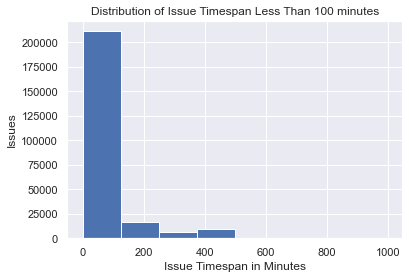

In [177]:
df.timespan_min[df.timespan_min < 1000].hist(bins=8)
plt.xlabel('Issue Timespan in Minutes')
plt.ylabel('Issues')
plt.title('Distribution of Issue Timespan Less Than 100 minutes');

This plot shows the average timespan of a given issue in minutes. It should be narrowed down further.

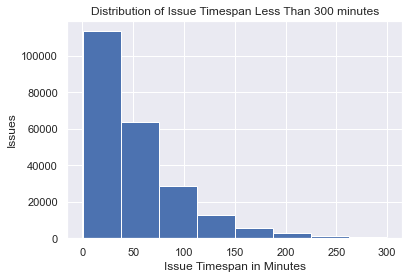

In [178]:
df.timespan_min[df.timespan_min < 300].hist(bins=8)
plt.xlabel('Issue Timespan in Minutes')
plt.ylabel('Issues')
plt.title('Distribution of Issue Timespan Less Than 300 minutes');

Cutting the time off at 5 hours seems reasonable. 

In [179]:
df = df[df.timespan_min <= 200]
df.timespan_min.max()

200.0

In [180]:
df.shape

(225678, 10)

At this point I have had to disregard about 10% of the rows due to NaN, 0 values, negative values, or values with unreasonable resolution times.

In [181]:
df.describe()

,Latitude,Longitude,issue_timespan,published_day,timespan_sec,timespan_min
count,225678.000000,225678.000000,225678,225678.000000,225678.000000,225678.000000
mean,30.301513,-97.733257,0 days 00:49:41.071367169,2.906322,2981.071367,49.684523
std,0.094177,0.087777,0 days 00:39:41.970865534,1.935242,2381.970866,39.699514
min,30.003883,-98.816154,0 days 00:00:20,0.000000,20.000000,0.333333
25%,30.231747,-97.777333,0 days 00:19:31,1.000000,1171.000000,19.516667
50%,30.293777,-97.734459,0 days 00:37:31,3.000000,2251.000000,37.516667
75%,30.373795,-97.686909,0 days 01:08:33.750000,5.000000,4113.750000,68.562500
max,31.077333,-97.108986,0 days 03:20:00,6.000000,12000.000000,200.000000


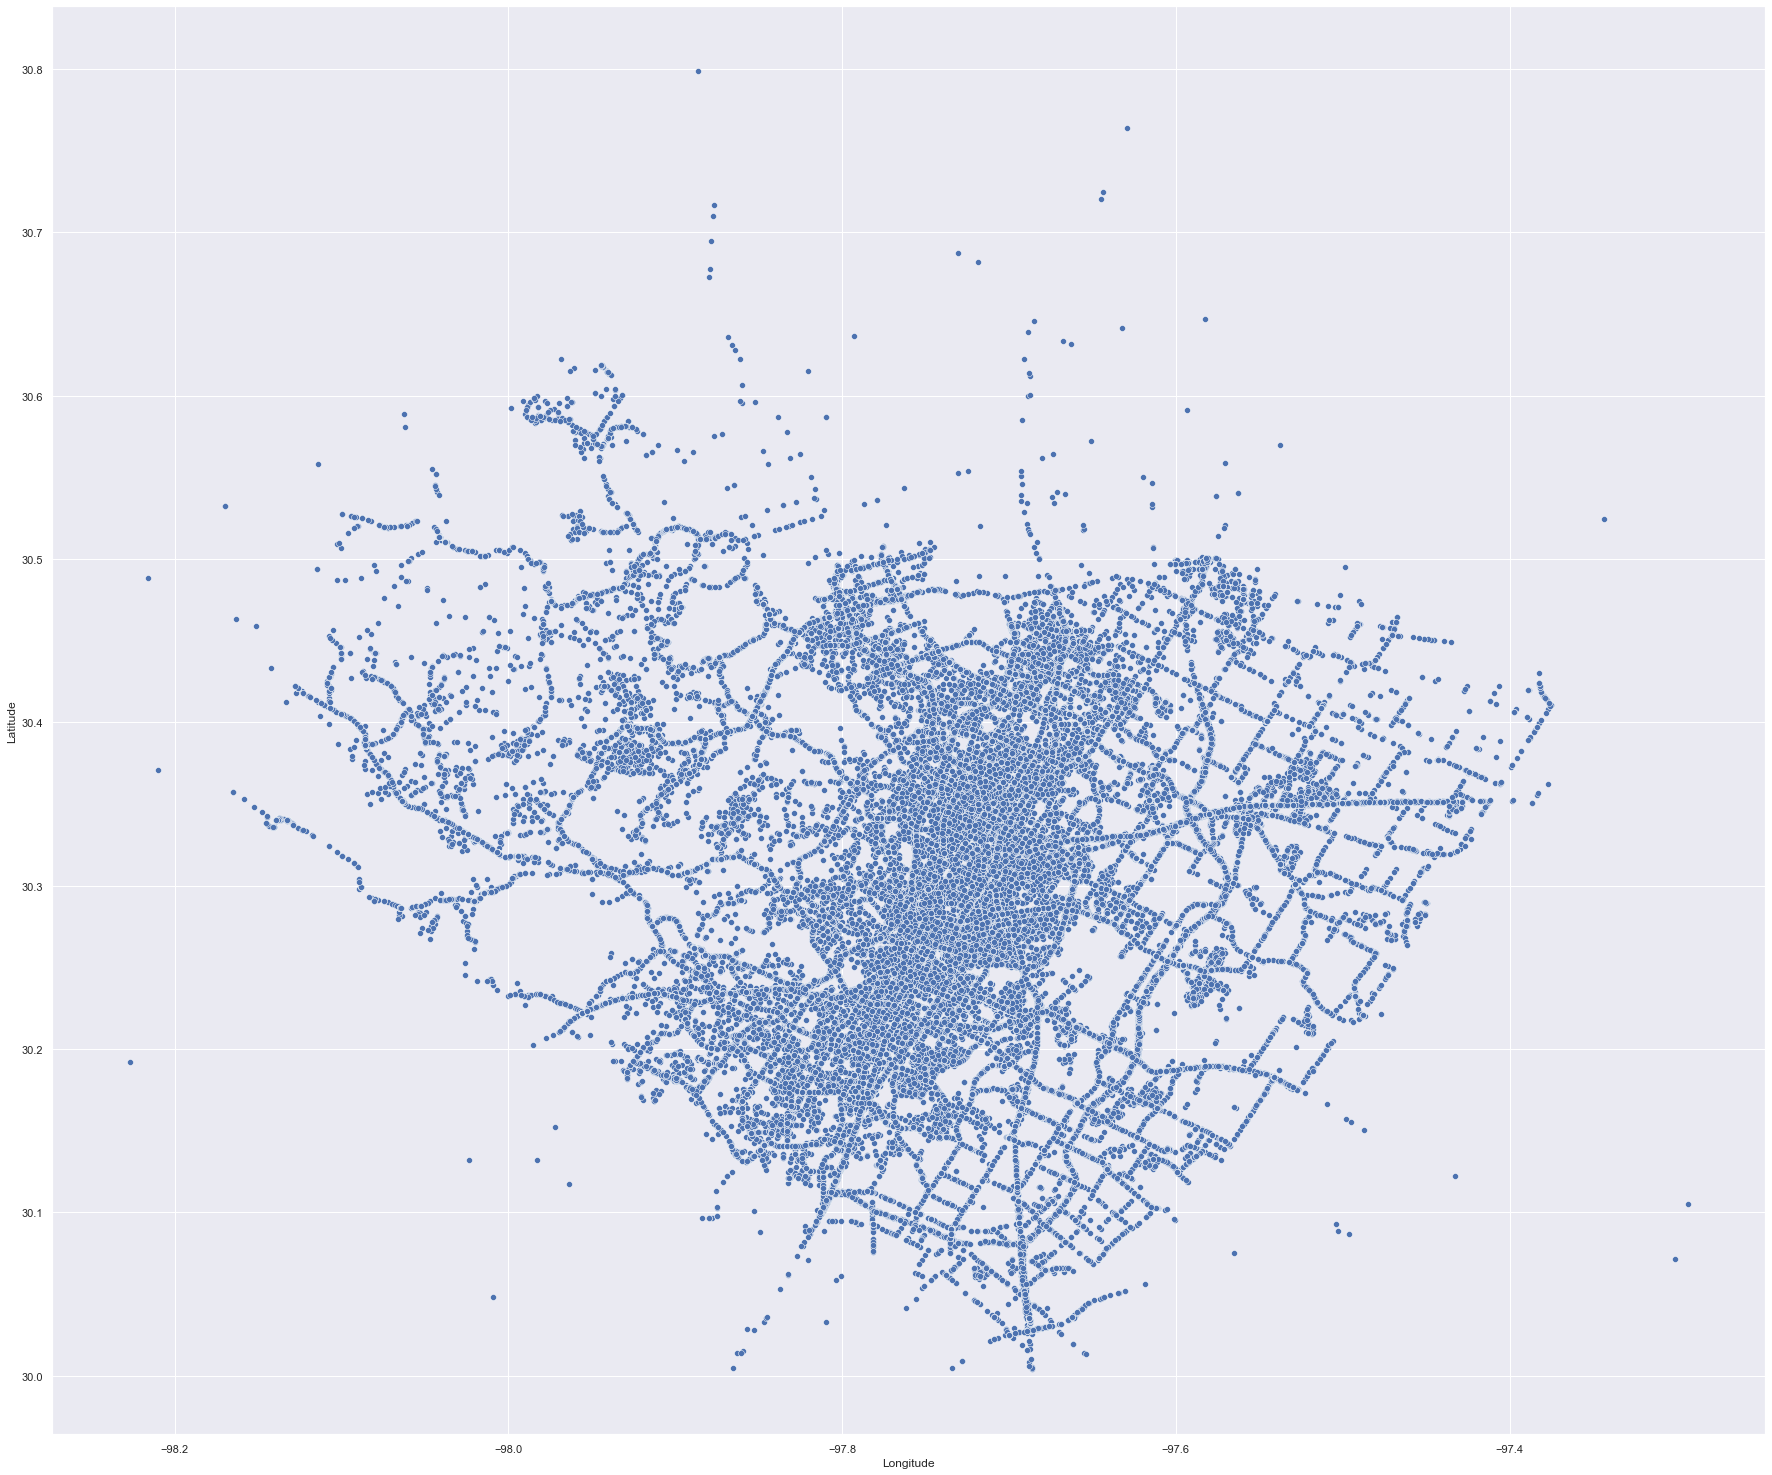

In [189]:
sns.scatterplot(x='Longitude',y='Latitude', data=df)
sns.set(rc={'figure.figsize':(30.7,26.27)})

The Latitude/Longitude data shows a decent map of austin. I could zoom in a little further to get more detail with losing too manuy more values. I will narrow the grid to Latitude 30.0 to 30.8 and Longitude -97.25 to -98.25

In [190]:
df = df[((df.Latitude >30) & (df.Latitude < 30.8))]
df= df[((df['Longitude'] < -97.25) &(df['Longitude'] > -98.25))]

sns.scatterplot(x='Longitude',y='Latitude', data=df)

# Volume of Unique Issues Reported Over 100

Before we finish up lets take one last look at the categorical data.

In [191]:
df['issue_reported'].value_counts()

Traffic Hazard                70992
Crash Urgent                  52542
Crash Service                 32482
COLLISION                     20574
TRFC HAZD/ DEBRIS             16337
zSTALLED VEHICLE               8023
LOOSE LIVESTOCK                5567
COLLISION WITH INJURY          5286
Traffic Impediment             4712
COLLISN/ LVNG SCN              3976
Stalled Vehicle                2795
COLLISION/PRIVATE PROPERTY      917
VEHICLE FIRE                    753
BLOCKED DRIV/ HWY               489
Name: issue_reported, dtype: int64

In [192]:
There are currently 23 different categories of traffice issues. Some categories only have a few instances though.

SyntaxError: invalid syntax (921700355.py, line 1)

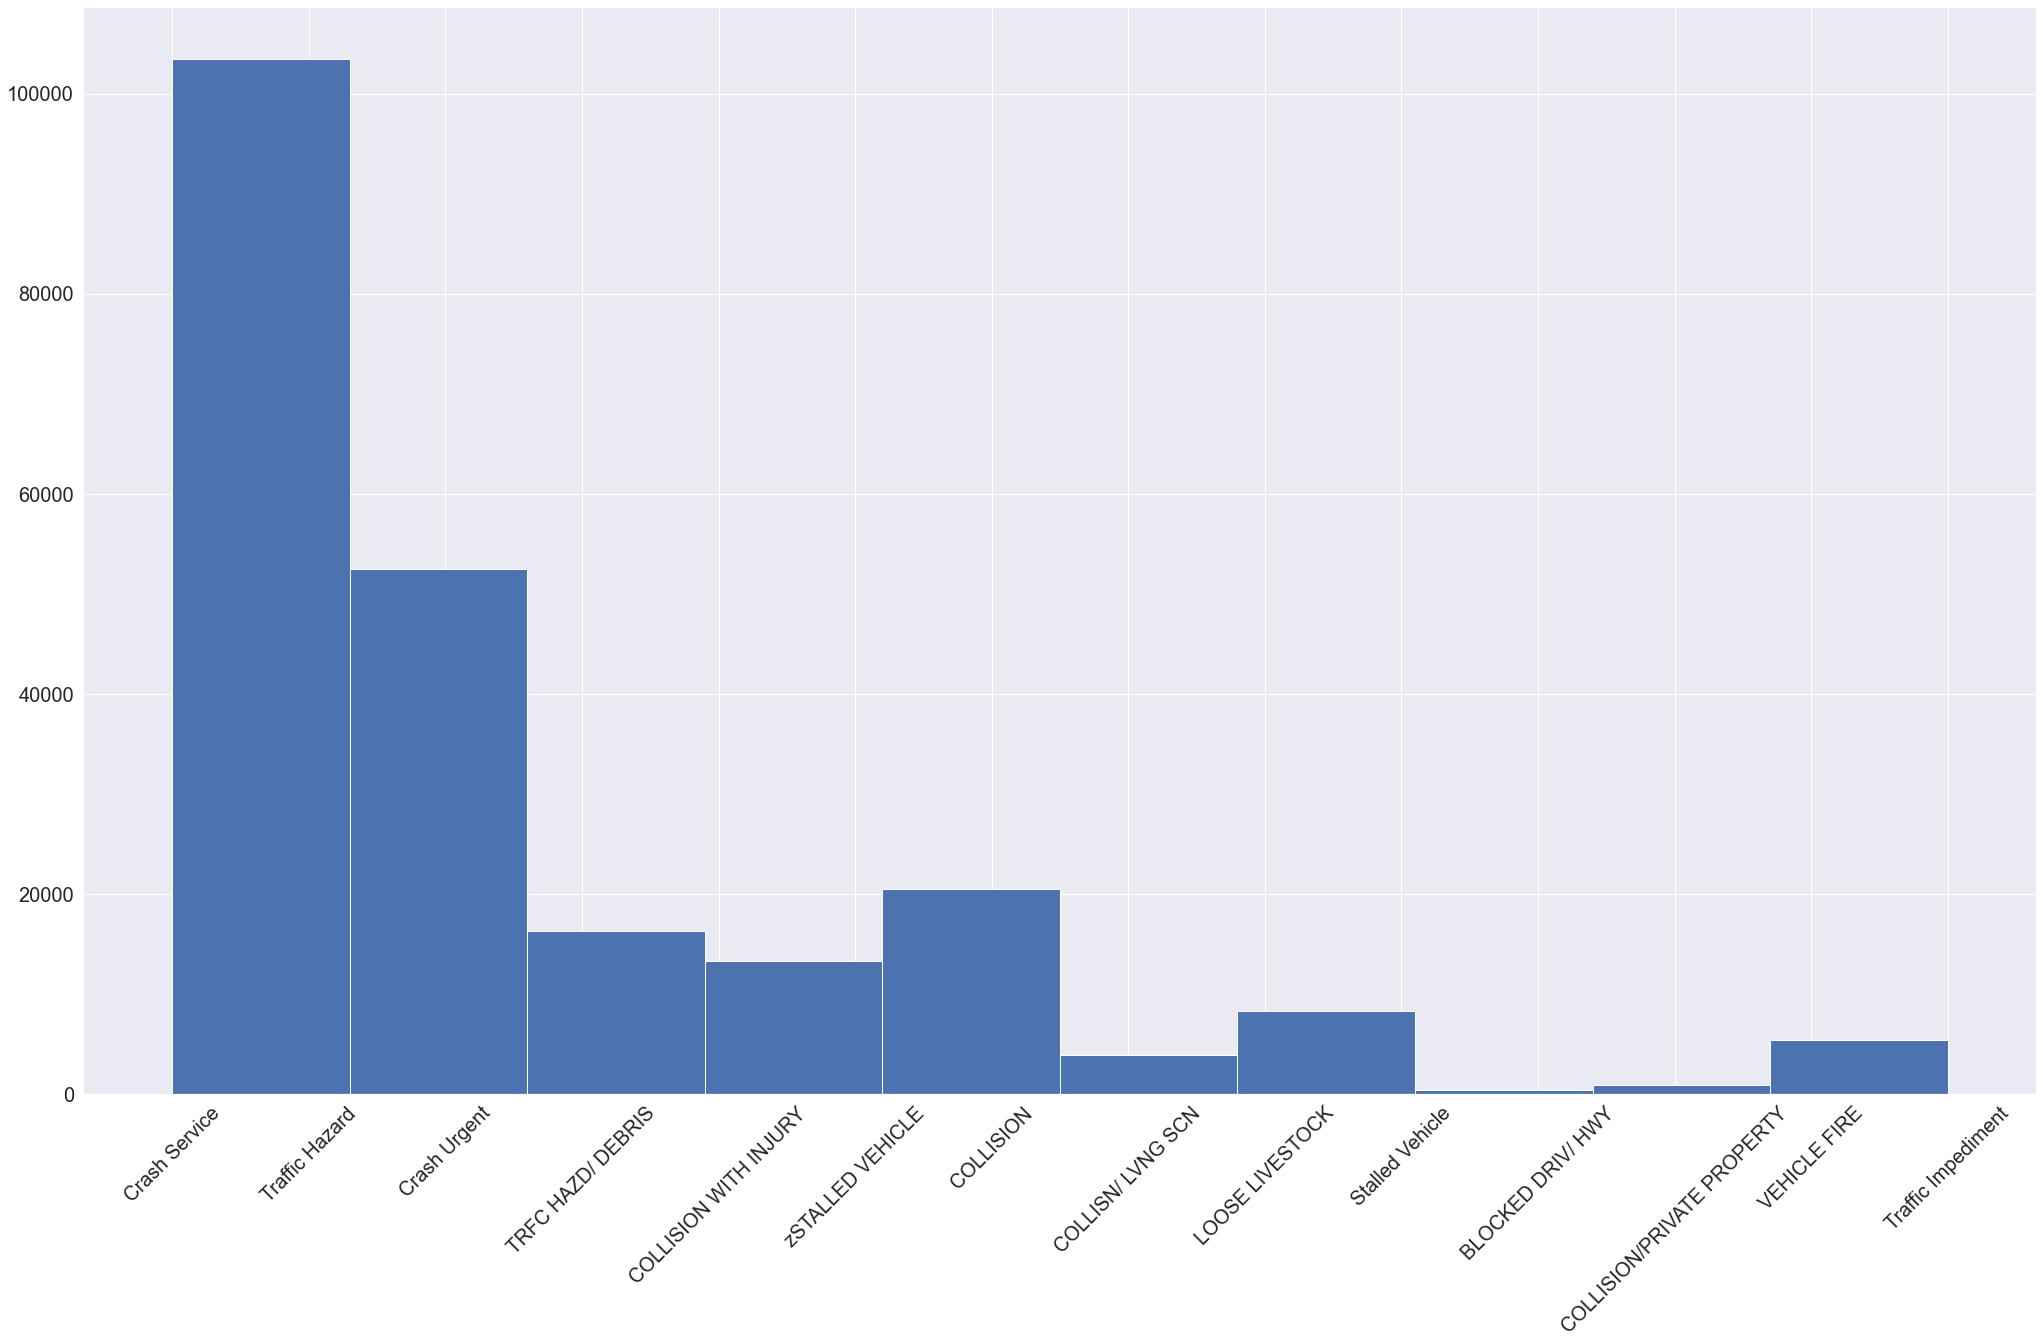

In [193]:
df.issue_reported.hist(figsize=(35,20))
plt.xticks(fontsize = 20, rotation=45)
plt.yticks(fontsize = 20)
plt.show()

There may be some vaule in learning how long some issue take to resolve and where these issue may take place aroun the city. This data is over the course of five years, and if an instance of the issue hasen't happened at least 100 times, than the samples are likely insignificant.

In [194]:
df = df.groupby('issue_reported').filter(lambda x : len(x)>100)
df.issue_reported.unique()

array(['Crash Service', 'Traffic Hazard', 'Crash Urgent',
       'TRFC HAZD/ DEBRIS', 'COLLISION WITH INJURY', 'zSTALLED VEHICLE',
       'COLLISION', 'COLLISN/ LVNG SCN', 'LOOSE LIVESTOCK',
       'Stalled Vehicle', 'BLOCKED DRIV/ HWY',
       'COLLISION/PRIVATE PROPERTY', 'VEHICLE FIRE', 'Traffic Impediment'],
      dtype=object)

We have now narrowed it down to 14 issues.

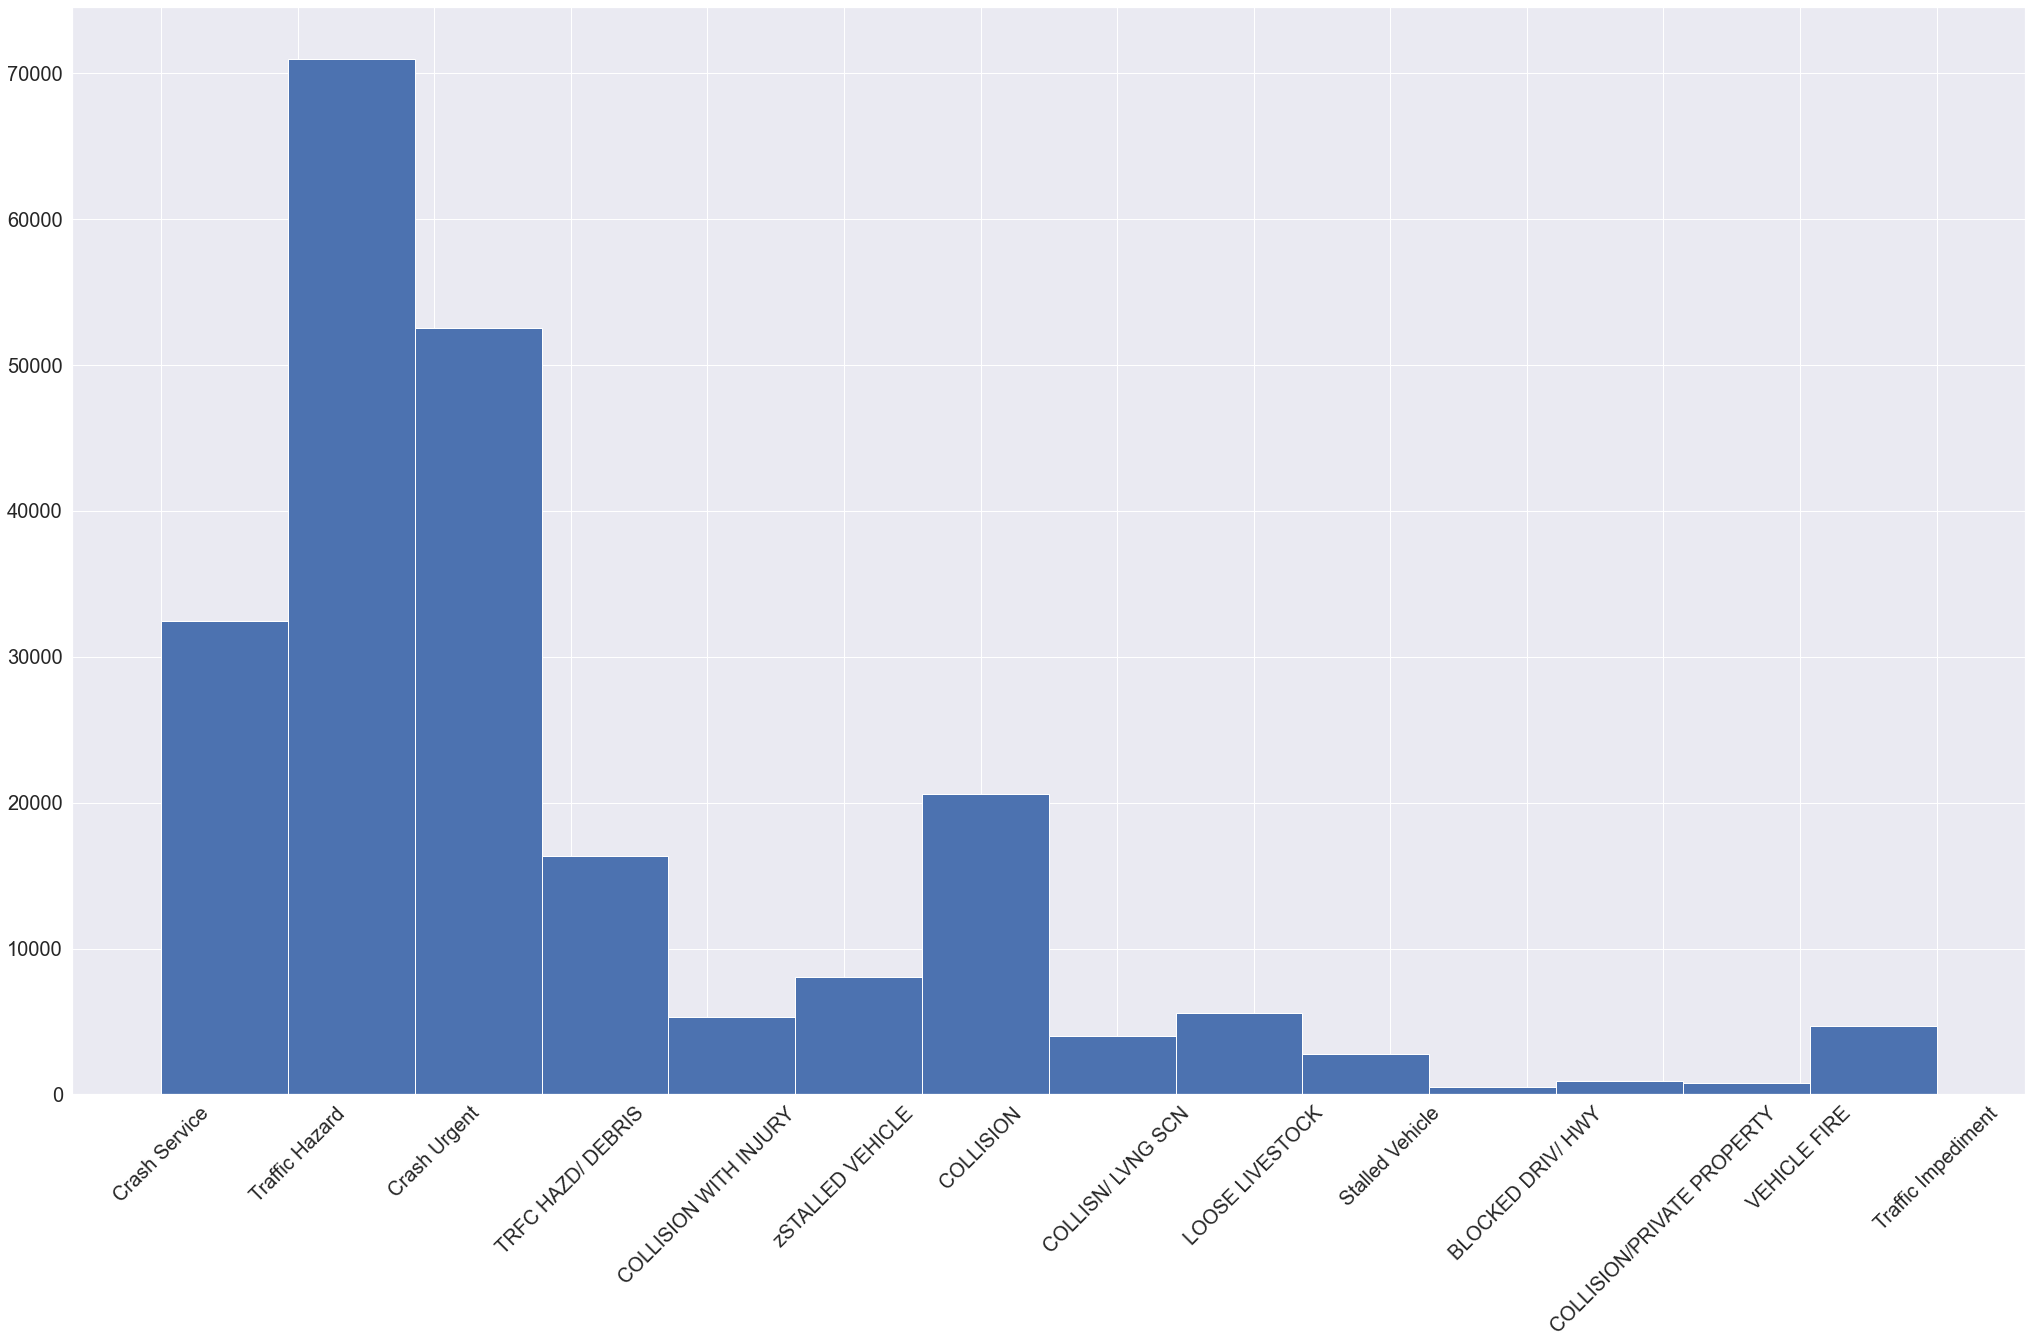

In [195]:

df.issue_reported.hist(figsize=(35,20), bins=14)
plt.xticks(fontsize = 20, rotation=45)
plt.yticks(fontsize = 20)
plt.show()

In [196]:
df.shape

(225445, 10)

In [197]:
df.head()

,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day,timespan_sec,timespan_min
short_ID,,,,,,,,,,
C16,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2,8644.0,144.066667
6B2,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2,3867.0,64.450000
2A7,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4,1800.0,30.000000
89D,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4,851.0,14.183333
E7F,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4,8949.0,149.150000


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225445 entries, C16 to F7C
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   published_date  225445 non-null  datetime64[ns, UTC]
 1   issue_reported  225445 non-null  object             
 2   Latitude        225445 non-null  float64            
 3   Longitude       225445 non-null  float64            
 4   Address         225445 non-null  object             
 5   status_date     225445 non-null  datetime64[ns, UTC]
 6   issue_timespan  225445 non-null  timedelta64[ns]    
 7   published_day   225445 non-null  int64              
 8   timespan_sec    225445 non-null  float64            
 9   timespan_min    225445 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(4), int64(1), object(2), timedelta64[ns](1)
memory usage: 18.9+ MB


In [207]:
df['time'] = df.published_date.dt.time
df.head()

,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day,timespan_sec,timespan_min,time
short_ID,,,,,,,,,,,
C16,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2,8644.0,144.066667,06:35:59
6B2,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2,3867.0,64.450000,10:15:36
2A7,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4,1800.0,30.000000,21:25:03
89D,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4,851.0,14.183333,21:40:52
E7F,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4,8949.0,149.150000,21:00:55


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225445 entries, C16 to F7C
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   published_date  225445 non-null  datetime64[ns, UTC]
 1   issue_reported  225445 non-null  object             
 2   Latitude        225445 non-null  float64            
 3   Longitude       225445 non-null  float64            
 4   Address         225445 non-null  object             
 5   status_date     225445 non-null  datetime64[ns, UTC]
 6   issue_timespan  225445 non-null  timedelta64[ns]    
 7   published_day   225445 non-null  int64              
 8   timespan_sec    225445 non-null  float64            
 9   timespan_min    225445 non-null  float64            
 10  time            225445 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 20.6+ MB


In [224]:
df['time'] = df['time'].astype(str)

df['time'] = df['time'].str.replace(':','')
df['time'] = pd.to_numeric(df['time'], errors = 'coerce')
df.head()

,published_date,issue_reported,Latitude,Longitude,Address,status_date,issue_timespan,published_day,timespan_sec,timespan_min,time
short_ID,,,,,,,,,,,
C16,2018-06-13 06:35:59+00:00,Crash Service,30.283797,-97.741906,W 21ST ST & GUADALUPE ST,2018-06-13 09:00:03+00:00,0 days 02:24:04,2,8644.0,144.066667,63559
6B2,2018-06-13 10:15:36+00:00,Traffic Hazard,30.339593,-97.700963,400-717 E ANDERSON LN EB,2018-06-13 11:20:03+00:00,0 days 01:04:27,2,3867.0,64.450000,101536
2A7,2020-04-17 21:25:03+00:00,Crash Urgent,30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,2020-04-17 21:55:03+00:00,0 days 00:30:00,4,1800.0,30.000000,212503
89D,2020-04-17 21:40:52+00:00,Traffic Hazard,30.202806,-97.760701,5300-blk S Ih 35 Sb,2020-04-17 21:55:03+00:00,0 days 00:14:11,4,851.0,14.183333,214052
E7F,2020-04-17 21:00:55+00:00,Crash Urgent,30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,2020-04-17 23:30:04+00:00,0 days 02:29:09,4,8949.0,149.150000,210055


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225445 entries, C16 to F7C
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   published_date  225445 non-null  datetime64[ns, UTC]
 1   issue_reported  225445 non-null  object             
 2   Latitude        225445 non-null  float64            
 3   Longitude       225445 non-null  float64            
 4   Address         225445 non-null  object             
 5   status_date     225445 non-null  datetime64[ns, UTC]
 6   issue_timespan  225445 non-null  timedelta64[ns]    
 7   published_day   225445 non-null  int64              
 8   timespan_sec    225445 non-null  float64            
 9   timespan_min    225445 non-null  float64            
 10  time            225445 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(4), int64(2), object(2), timedelta64[ns](1)
memory usage: 20.6+ MB


Create a column that contains nothing but the time of day in which the incidents ocorred.

In [225]:
df.describe()

,Latitude,Longitude,issue_timespan,published_day,timespan_sec,timespan_min,time
count,225445.000000,225445.000000,225445,225445.000000,225445.000000,225445.000000,225445.000000
mean,30.301440,-97.733156,0 days 00:49:39.937017897,2.906261,2979.937018,49.665617,139917.583326
std,0.094080,0.087511,0 days 00:39:41.053572875,1.935056,2381.053573,39.684226,71446.568218
min,30.003883,-98.226709,0 days 00:00:20,0.000000,20.000000,0.333333,0.000000
25%,30.231715,-97.777183,0 days 00:19:30,1.000000,1170.000000,19.500000,90900.000000
50%,30.293602,-97.734450,0 days 00:37:30,3.000000,2250.000000,37.500000,155017.000000
75%,30.373691,-97.686922,0 days 01:08:31,5.000000,4111.000000,68.516667,200357.000000
max,30.798642,-97.293320,0 days 03:20:00,6.000000,12000.000000,200.000000,235959.000000


The data looks clean.

In [222]:
df.to_csv('traffic_data_cleaned.csv')